In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csky as cy
from scipy import stats
import glob
import matplotlib.cm as cm
import matplotlib as mpl
from scipy.optimize import curve_fit

mpl.rcParams['xtick.labelsize']=18
mpl.rcParams['ytick.labelsize']=18
mpl.rcParams['axes.labelsize']=24
mpl.rcParams['lines.linewidth']=3
mpl.rcParams['patch.linewidth']=3
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['axes.titlesize']=24
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['figure.figsize'] = 10, 6
mpl.rcParams['font.family'] = 'sans-serif'

In [5]:
def get_flarelist(srcid, trial):
    flist = trial[srcid]
    if len(flist)!=0.:
        farr = np.empty(len(flist), dtype=[('tstart', float), ('tstop', float), ('ts', float), ('ns', float), ('gamma', float)])
        farr['tstart'] = flist.mjd_start
        farr['tstop'] = flist.mjd_end
        farr['ts'] = flist.ts
        farr['ns'] = flist.ns
        farr['gamma'] = flist.gamma
    else:
        farr = np.empty(1, dtype=[('tstart', float), ('tstop', float), ('ts', float), ('ns', float), ('gamma', float)])
        farr['tstart'] = [0.]
        farr['tstop'] = [0.]
        farr['ts'] = [0.]
        farr['ns'] = [0.]
        farr['gamma'] = [0.]
    return farr


def fit_chi2(tsarr):
    fithist, fitbins = np.histogram(tsarr, bins = np.linspace(0,30,30), density=True)
    fitbins = fitbins[:-1]
    #fithist = np.log10(fithist)
    #plt.plot(fitbins, fithist, drawstyle='steps-post')

    fitbin_centers = fitbins+(fitbins[1]-fitbins[0])*0.5


    def f(x, ndof, loc, scale):
        return stats.gamma.pdf(x, ndof, loc, scale)

    fit_x = fitbin_centers[1:15]
    fit_y = fithist[1:15]

    params, cov = curve_fit(f, fit_x, fit_y)
    #print(fit_x, fit_y)
    #print(params)

    #xplt = np.linspace(0,30,100)
    #plt.plot(xplt, f(xplt, params[0], params[1], params[2] ))
    #plt.semilogy()
    return params

In [6]:
psv2_bg = np.load('/data/user/wluszczak/KDE_csky/tdep/bg/old/psv2_bg_combined.npy', allow_pickle=True)

sfts_psv2 = []
for trial in psv2_bg:
    flist = get_flarelist(50579430, trial)
    sfts_psv2.append(flist['ts'][0])
    
fitparams_psv2 = fit_chi2(sfts_psv2)
    
psv2hist, psv2bins = np.histogram(sfts_psv2, bins = np.linspace(0,40,40), density=True)
psv2hist = np.concatenate([psv2hist, [0]])

psv2_sig = np.load('/data/user/wluszczak/KDE_csky/tdep/sig/txs_psv2.npy', allow_pickle=True)

txsts_psv2 = []
sigs_psv2 = []
for trial in psv2_sig:
    flist = get_flarelist(50579430, trial)
    txsts_psv2.append(flist['ts'][0])
    p = 1-stats.gamma.cdf(flist['ts'][0], fitparams_psv2[0], fitparams_psv2[1], fitparams_psv2[2])
    sig = stats.norm.ppf(1-p)
    sigs_psv2.append(sig)
    

In [7]:
psv3_bg = np.load('/data/user/wluszczak/KDE_csky/tdep/bg/old/psv3_bg_combined.npy', allow_pickle=True)

sfts_psv3 = []
for trial in psv3_bg:
    flist = get_flarelist(50579430, trial)
    sfts_psv3.append(flist['ts'][0])
    
fitparams_psv3 = fit_chi2(sfts_psv3)
    
psv3hist, psv3bins = np.histogram(sfts_psv3, bins = np.linspace(0,40,40), density=True)
psv3hist = np.concatenate([psv3hist, [0]])

psv3_sig = np.load('/data/user/wluszczak/KDE_csky/tdep/sig/txs_psv3.npy', allow_pickle=True)

txsts_psv3 = []
sigs_psv3 = []
for trial in psv3_sig:
    flist = get_flarelist(50579430, trial)
    txsts_psv3.append(flist['ts'][0])
    p = 1-stats.gamma.cdf(flist['ts'][0], fitparams_psv3[0], fitparams_psv3[1], fitparams_psv3[2])
    sig = stats.norm.ppf(1-p)
    sigs_psv3.append(sig)

In [8]:
ntv2_bg = np.load('/data/user/wluszczak/KDE_csky/tdep/bg/old/ntv2_bg_combined.npy', allow_pickle=True)

sfts_ntv2 = []
for trial in ntv2_bg:
    flist = get_flarelist(50579430, trial)
    sfts_ntv2.append(flist['ts'][0])
    
fitparams_ntv2 = fit_chi2(sfts_ntv2)
    
ntv2hist, ntv2bins = np.histogram(sfts_ntv2, bins = np.linspace(0,40,40), density=True)
ntv2hist = np.concatenate([ntv2hist, [0]])

ntv2_sig = np.load('/data/user/wluszczak/KDE_csky/tdep/sig/txs_ntv2.npy', allow_pickle=True)

txsts_ntv2 = []
sigs_ntv2 = []
for trial in ntv2_sig:
    flist = get_flarelist(50579430, trial)
    txsts_ntv2.append(flist['ts'][0])
    p = 1-stats.gamma.cdf(flist['ts'][0], fitparams_ntv2[0], fitparams_ntv2[1], fitparams_ntv2[2])
    sig = stats.norm.ppf(1-p)
    sigs_ntv2.append(sig)

In [9]:
ntv5_bg = np.load('/data/user/wluszczak/KDE_csky/tdep/bg/old/ntv5_bg_combined.npy', allow_pickle=True)

sfts_ntv5 = []
for trial in ntv5_bg:
    flist = get_flarelist(50579430, trial)
    sfts_ntv5.append(flist['ts'][0])
    
fitparams_ntv5 = fit_chi2(sfts_ntv5)
    
ntv5hist, ntv5bins = np.histogram(sfts_ntv5, bins = np.linspace(0,40,40), density=True)
ntv5hist = np.concatenate([ntv5hist, [0]])

ntv5_sig = np.load('/data/user/wluszczak/KDE_csky/tdep/sig/txs_ntv5.npy', allow_pickle=True)

txsts_ntv5 = []
sigs_ntv5 = []
for trial in ntv5_sig:
    flist = get_flarelist(50579430, trial)
    txsts_ntv5.append(flist['ts'][0])
    p = 1-stats.gamma.cdf(flist['ts'][0], fitparams_ntv5[0], fitparams_ntv5[1], fitparams_ntv5[2])
    sig = stats.norm.ppf(1-p)
    sigs_ntv5.append(sig)
    

Text(0.5,1,'TXS 0506+056 Untriggered Flare Significance')

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


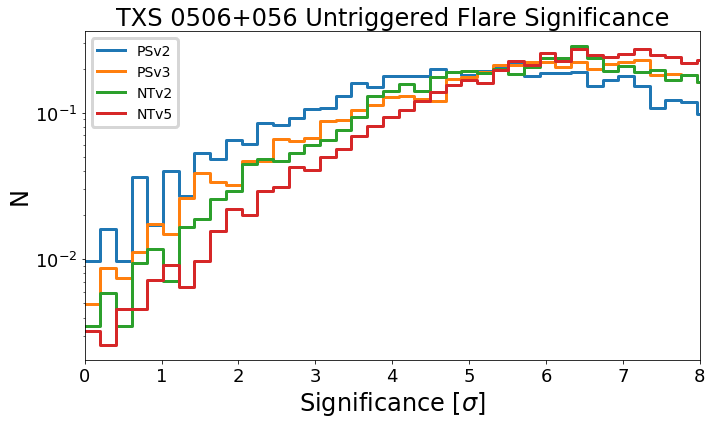

In [10]:
sighist_psv2, sigbins_psv2 = np.histogram(sigs_psv2, bins = np.linspace(0,10,50), density=True)
sighist_psv2 = np.concatenate([sighist_psv2,[0]])
plt.semilogy(sigbins_psv2, sighist_psv2, drawstyle='steps-post', label='PSv2')

sighist_psv3, sigbins_psv3 = np.histogram(sigs_psv3, bins = np.linspace(0,10,50), density=True)
sighist_psv3 = np.concatenate([sighist_psv3,[0]])
plt.semilogy(sigbins_psv3, sighist_psv3, drawstyle='steps-post', label='PSv3')

sighist_ntv2, sigbins_ntv2 = np.histogram(sigs_ntv2, bins = np.linspace(0,10,50), density=True)
sighist_ntv2 = np.concatenate([sighist_ntv2,[0]])
plt.semilogy(sigbins_ntv2, sighist_ntv2, drawstyle='steps-post', label='NTv2')

sighist_ntv5, sigbins_ntv5 = np.histogram(sigs_ntv5, bins = np.linspace(0,10,50), density=True)
sighist_ntv5 = np.concatenate([sighist_ntv5,[0]])
plt.semilogy(sigbins_ntv5, sighist_ntv5, drawstyle='steps-post', label='NTv5')
plt.xlim(0,8)
plt.xlabel('Significance [$\sigma$]')
plt.ylabel('N')
plt.legend(loc=0)
plt.title("TXS 0506+056 Untriggered Flare Significance")